In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True, classifier='unetplus', base_filters=8)

*** GP2 ***
Working directory: /tmp/tmp3e5x5lj0GP2
Verbose mode active!


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 8)  32          conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 8)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images.shape

(10000, 512, 512, 1)

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
print(images.max())

255


In [8]:
print(images.min())

0


In [9]:
print(masks.max())

True


In [10]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [11]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [12]:
RUNS = 5

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
8/8 [==============================] - 26s 2s/step - loss: 0.7728 - dice_coef: 0.1651 - val_loss: 0.7714 - val_dice_coef: 0.1651
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.7710 - dice_coef: 0.1656 - val_loss: 0.7724 - val_dice_coef: 0.1652
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 0.7694 - dice_coef: 0.1664 - val_loss: 0.7733 - val_dice_coef: 0.1653
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.7678 - dice_coef: 0.1672 - val_loss: 0.7748 - val_dice_coef: 0.1653
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.7662 - dice_coef: 0.1680 - val_loss: 0.7763 - val_dice_coef: 0.1654
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 0.7645 - dice_coef: 0.1683 - val_loss: 0.7781 - val_dice_coef: 0.1657
Epoch 7/100
8/8 [==============================] - 9s 1s/step - loss: 0.7628 - dice_coef: 0.1693 - val_loss: 0.7799 - val_dice_coef: 0.1660
Epoch 8/

8/8 [==============================] - 9s 1s/step - loss: 0.6840 - dice_coef: 0.1825 - val_loss: 0.7602 - val_dice_coef: 0.1739
Epoch 60/100
8/8 [==============================] - 9s 1s/step - loss: 0.6831 - dice_coef: 0.1828 - val_loss: 0.7492 - val_dice_coef: 0.1752
Epoch 61/100
8/8 [==============================] - 9s 1s/step - loss: 0.6822 - dice_coef: 0.1827 - val_loss: 0.7463 - val_dice_coef: 0.1755
Epoch 62/100
8/8 [==============================] - 9s 1s/step - loss: 0.6813 - dice_coef: 0.1828 - val_loss: 0.7523 - val_dice_coef: 0.1746
Epoch 63/100
8/8 [==============================] - 9s 1s/step - loss: 0.6807 - dice_coef: 0.1828 - val_loss: 0.7426 - val_dice_coef: 0.1758
Epoch 64/100
8/8 [==============================] - 10s 1s/step - loss: 0.6798 - dice_coef: 0.1829 - val_loss: 0.7445 - val_dice_coef: 0.1756
Epoch 65/100
8/8 [==============================] - 9s 1s/step - loss: 0.6789 - dice_coef: 0.1828 - val_loss: 0.7428 - val_dice_coef: 0.1757
Epoch 66/100
8/8 [=======

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 0.6561 - dice_coef: 0.1851 - val_loss: 0.7083 - val_dice_coef: 0.1779
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.6556 - dice_coef: 0.1847 - val_loss: 0.7227 - val_dice_coef: 0.1762
Epoch 3/100
10/10 [==============================] - 10s 1s/step - loss: 0.6550 - dice_coef: 0.1849 - val_loss: 0.7156 - val_dice_coef: 0.1768
Epoch 4/100
10/10 [==============================] - 10s 1s/step - loss: 0.6544 - dice_coef: 0.1851 - val_loss: 0.7310 - val_dice_coef: 0.1751
Epoch 5/100
10/10 [==============================] - 10s 1s/step - loss: 0.6539 - dice_coef: 0.1841 - val_loss: 0.7083 - val_dice_coef: 0.1779
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.6534 - dice_coef: 0.1843 - val_loss: 0.7133 - val_dice_coef: 0.1772
Epoch 7/100
10/10 [==============================] - 10s 1s/step - loss: 0.6527 - dice_coef: 0.1851 - val_loss: 0.7023 - val_dice_coef: 0.1783

Epoch 58/100
10/10 [==============================] - 10s 1s/step - loss: 0.6287 - dice_coef: 0.1873 - val_loss: 0.6968 - val_dice_coef: 0.1777
Epoch 59/100
10/10 [==============================] - 10s 1s/step - loss: 0.6282 - dice_coef: 0.1860 - val_loss: 0.6969 - val_dice_coef: 0.1777
Epoch 60/100
10/10 [==============================] - 11s 1s/step - loss: 0.6278 - dice_coef: 0.1866 - val_loss: 0.7056 - val_dice_coef: 0.1765
Epoch 61/100
10/10 [==============================] - 10s 1s/step - loss: 0.6274 - dice_coef: 0.1865 - val_loss: 0.6959 - val_dice_coef: 0.1777
Epoch 62/100
10/10 [==============================] - 10s 1s/step - loss: 0.6271 - dice_coef: 0.1870 - val_loss: 0.6871 - val_dice_coef: 0.1789
Epoch 63/100
10/10 [==============================] - 10s 1s/step - loss: 0.6266 - dice_coef: 0.1862 - val_loss: 0.6950 - val_dice_coef: 0.1777
Epoch 64/100
10/10 [==============================] - 10s 1s/step - loss: 0.6264 - dice_coef: 0.1857 - val_loss: 0.6938 - val_dice_coef:

Epoch 1/100
11/11 [==============================] - 16s 1s/step - loss: 0.6113 - dice_coef: 0.1889 - val_loss: 0.6789 - val_dice_coef: 0.1793
Epoch 2/100
11/11 [==============================] - 12s 1s/step - loss: 0.6105 - dice_coef: 0.1889 - val_loss: 0.6929 - val_dice_coef: 0.1774
Epoch 3/100
11/11 [==============================] - 11s 1s/step - loss: 0.6101 - dice_coef: 0.1890 - val_loss: 0.6796 - val_dice_coef: 0.1792
Epoch 4/100
11/11 [==============================] - 11s 1s/step - loss: 0.6097 - dice_coef: 0.1891 - val_loss: 0.6800 - val_dice_coef: 0.1792
Epoch 5/100
11/11 [==============================] - 11s 1s/step - loss: 0.6092 - dice_coef: 0.1892 - val_loss: 0.6804 - val_dice_coef: 0.1791
Epoch 6/100
11/11 [==============================] - 11s 1s/step - loss: 0.6089 - dice_coef: 0.1892 - val_loss: 0.6756 - val_dice_coef: 0.1798
Epoch 7/100
11/11 [==============================] - 12s 1s/step - loss: 0.6084 - dice_coef: 0.1894 - val_loss: 0.6865 - val_dice_coef: 0.1782

Epoch 58/100
11/11 [==============================] - 11s 1s/step - loss: 0.5866 - dice_coef: 0.1927 - val_loss: 0.6299 - val_dice_coef: 0.1861
Epoch 59/100
11/11 [==============================] - 12s 1s/step - loss: 0.5861 - dice_coef: 0.1928 - val_loss: 0.6401 - val_dice_coef: 0.1846
Epoch 60/100
11/11 [==============================] - 11s 1s/step - loss: 0.5859 - dice_coef: 0.1928 - val_loss: 0.6450 - val_dice_coef: 0.1839
Epoch 61/100
11/11 [==============================] - 11s 1s/step - loss: 0.5854 - dice_coef: 0.1930 - val_loss: 0.6424 - val_dice_coef: 0.1843
Epoch 62/100
11/11 [==============================] - 11s 1s/step - loss: 0.5847 - dice_coef: 0.1930 - val_loss: 0.6414 - val_dice_coef: 0.1844
Epoch 63/100
11/11 [==============================] - 12s 1s/step - loss: 0.5842 - dice_coef: 0.1931 - val_loss: 0.6371 - val_dice_coef: 0.1850
Epoch 64/100
11/11 [==============================] - 11s 1s/step - loss: 0.5841 - dice_coef: 0.1932 - val_loss: 0.6691 - val_dice_coef:

D_relabeled_ 35
selected_ids ['7a612699-18e0-4bf0-9613-ddcce77848e1', '70847fc4-7561-4a7b-baa9-5fd27f35ef8d', 'f6e137c1-4824-4219-8425-e865fce03cd2', '601d0592-717f-4c01-bdad-221abb552c54', '73755b71-ba7f-46ff-9799-50c766a4ee93', 'ae7dbf9d-0f6a-4b01-bb46-ea96b247b085', '30718c36-de19-4cae-be13-c5a8f903533b', '573fb20d-b666-4ca1-902d-60478f1f30e1', '0443554c-4ee8-44e0-90e9-8f84fb4a35c7', '453d526c-063b-4f2b-b3b8-c31d45485dc0', 'de513fba-c154-4e3e-bf4e-5757976318d9', 'e44376bb-f7d4-40db-a3f5-b79206b67e88', '4805eab0-0ea9-4bdb-99d7-6bf00556a5ff', 'ab1e31be-199f-47e3-8570-f92d057fbf05', '2151608b-2838-4b0b-88a5-4c849bdb0432', 'c0f45a1c-c8a9-4d37-a096-3460894100a7', 'a4bcb279-0c46-4140-adce-214d6c69d6b5', 'e5680f06-cf74-499a-883a-de0778131eea', '8dad6460-7fda-45b2-9b0b-520be35660b4', '7790a6a1-d245-4cc6-a884-538b9d7fdd56', 'c26fb42b-9173-483d-ab50-0db8391375ab', '319e0a27-ec82-4d85-8e19-37b0bb46f41a', '66831411-1729-452d-acc0-caa9422f0dc9', '0e356b89-efc1-4aea-8a08-649f764d2356', '9fee7746-

12/12 [==============================] - 12s 999ms/step - loss: 0.5535 - dice_coef: 0.1989 - val_loss: 0.5877 - val_dice_coef: 0.1937
Epoch 38/100
12/12 [==============================] - 12s 1s/step - loss: 0.5531 - dice_coef: 0.1993 - val_loss: 0.5755 - val_dice_coef: 0.1956
Epoch 39/100
12/12 [==============================] - 12s 1s/step - loss: 0.5528 - dice_coef: 0.1999 - val_loss: 0.5825 - val_dice_coef: 0.1944
Epoch 40/100
12/12 [==============================] - 12s 1s/step - loss: 0.5523 - dice_coef: 0.1997 - val_loss: 0.5716 - val_dice_coef: 0.1964
Epoch 41/100
12/12 [==============================] - 12s 1s/step - loss: 0.5519 - dice_coef: 0.1993 - val_loss: 0.5683 - val_dice_coef: 0.1969
Epoch 42/100
12/12 [==============================] - 12s 1s/step - loss: 0.5515 - dice_coef: 0.1999 - val_loss: 0.5902 - val_dice_coef: 0.1933
Epoch 43/100
12/12 [==============================] - 12s 1s/step - loss: 0.5513 - dice_coef: 0.2002 - val_loss: 0.6179 - val_dice_coef: 0.1887
Ep

Epoch 94/100
12/12 [==============================] - 12s 1s/step - loss: 0.5296 - dice_coef: 0.2054 - val_loss: 0.5759 - val_dice_coef: 0.1964
Epoch 95/100
12/12 [==============================] - 12s 1s/step - loss: 0.5289 - dice_coef: 0.2045 - val_loss: 0.5531 - val_dice_coef: 0.2007
Epoch 96/100
12/12 [==============================] - 12s 1s/step - loss: 0.5287 - dice_coef: 0.2055 - val_loss: 0.5410 - val_dice_coef: 0.2028
Epoch 97/100
12/12 [==============================] - 12s 1s/step - loss: 0.5285 - dice_coef: 0.2054 - val_loss: 0.5449 - val_dice_coef: 0.2021
Epoch 98/100
12/12 [==============================] - 12s 1s/step - loss: 0.5279 - dice_coef: 0.2061 - val_loss: 0.5444 - val_dice_coef: 0.2023
Epoch 99/100
12/12 [==============================] - 12s 1s/step - loss: 0.5274 - dice_coef: 0.2051 - val_loss: 0.5562 - val_dice_coef: 0.1999
Epoch 100/100
12/12 [==============================] - 12s 1s/step - loss: 0.5272 - dice_coef: 0.2057 - val_loss: 0.5506 - val_dice_coef

Epoch 9/100
12/12 [==============================] - 12s 1s/step - loss: 0.5234 - dice_coef: 0.2064 - val_loss: 0.5653 - val_dice_coef: 0.1985
Epoch 10/100
12/12 [==============================] - 12s 1s/step - loss: 0.5229 - dice_coef: 0.2065 - val_loss: 0.5589 - val_dice_coef: 0.1999
Epoch 11/100
12/12 [==============================] - 13s 1s/step - loss: 0.5228 - dice_coef: 0.2066 - val_loss: 0.5413 - val_dice_coef: 0.2031
Epoch 12/100
12/12 [==============================] - 12s 1s/step - loss: 0.5222 - dice_coef: 0.2066 - val_loss: 0.5644 - val_dice_coef: 0.1988
Epoch 13/100
12/12 [==============================] - 12s 1s/step - loss: 0.5215 - dice_coef: 0.2067 - val_loss: 0.5618 - val_dice_coef: 0.1993
Epoch 14/100
12/12 [==============================] - 12s 1s/step - loss: 0.5215 - dice_coef: 0.2066 - val_loss: 0.5524 - val_dice_coef: 0.2010
Epoch 15/100
12/12 [==============================] - 12s 1s/step - loss: 0.5208 - dice_coef: 0.2069 - val_loss: 0.5601 - val_dice_coef: 

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

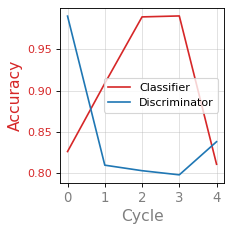

In [17]:
R.plot()